In [96]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from collections import Counter
from itertools import islice
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from tqdm import tqdm
import seaborn as sns
from prettytable import PrettyTable

In [98]:
ratings_dt = pd.read_csv('C:/Users/61450/Desktop/New folder/recommendation system/ml-latest-small/ratings.csv')
movie_dt = pd.read_csv('C:/Users/61450/Desktop/New folder/recommendation system/ml-latest-small/movies.csv')
ratings_dt.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [100]:
ratings_dt.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [102]:
ratings_dt['userId'] = ratings_dt['userId'].astype('category')
ratings_dt['movieId'] = ratings_dt['movieId'].astype('category')

In [104]:
ratings_dt.dtypes

userId       category
movieId      category
rating        float64
timestamp       int64
dtype: object

In [106]:
ratings_dt = ratings_dt.drop_duplicates(subset=['userId','movieId','rating','timestamp'], keep='first')
ratings_dt.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [108]:
movie_dt.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [110]:
movie_dt.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [112]:
movie_dt.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [114]:
movie_dt = movie_dt.drop_duplicates(subset=['movieId','title','genres'], keep='first')
movie_dt.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


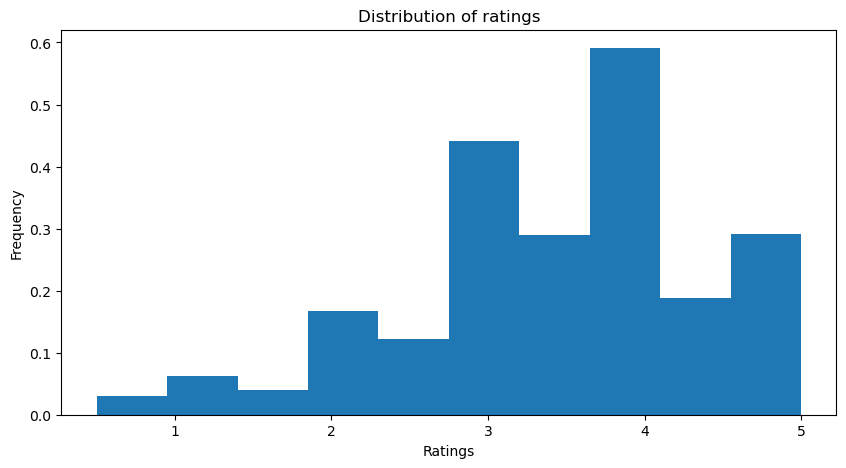

In [116]:
# Distribution of movie ratings

fig = plt.figure(figsize = (10, 5))
plt.hist(ratings_dt['rating'], bins=10, density=True)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of ratings")
plt.show()

<BarContainer object of 50 artists>

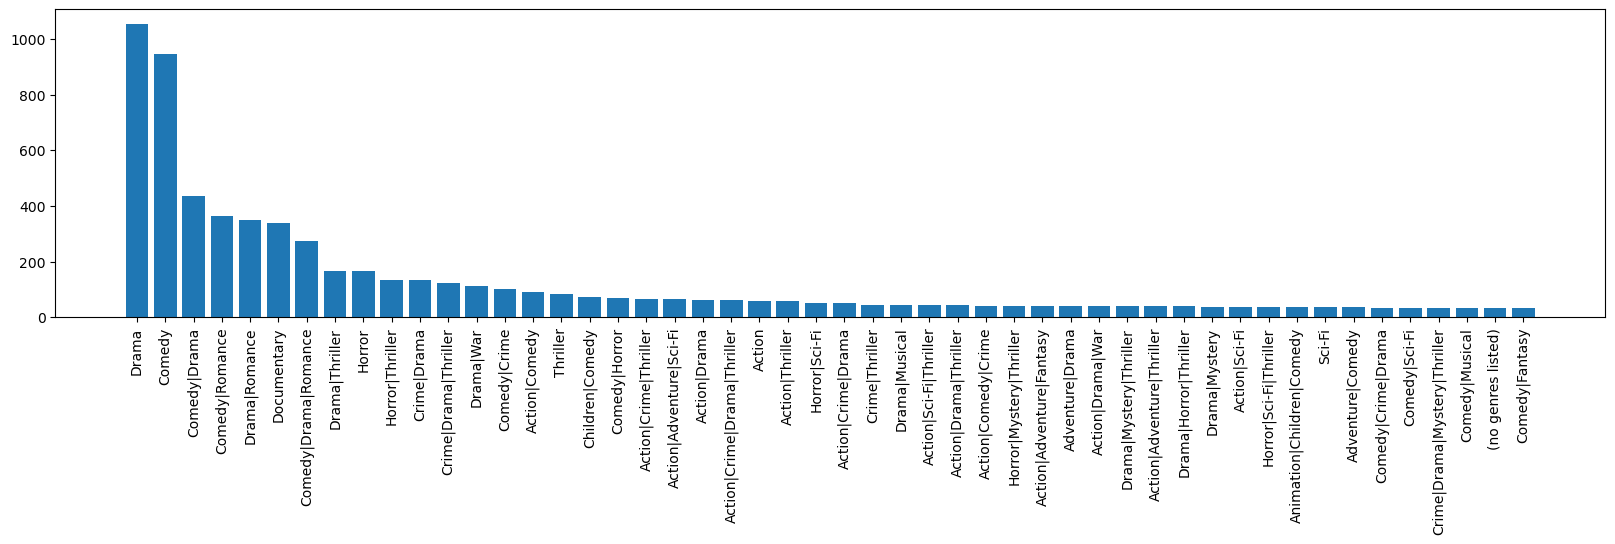

In [118]:
# Distribution of genres 

gen_count= Counter(movie_dt['genres'])
gen_sort = dict(sorted(gen_count.items(), key=lambda item : item[1], reverse=True))
gen_cnt = dict(islice(gen_sort.items(), 50))
fig, ax = plt.subplots(figsize = (20, 4))
ax.set_xticks(ticks=range(50), labels=gen_cnt.keys())
ax.set_xticklabels(labels=gen_cnt.keys(), rotation=90)
plt.bar(gen_cnt.keys(), gen_cnt.values())

In [120]:
# Normalisation of data ratings (0 to 1)

minmax = MinMaxScaler()
rat = minmax.fit_transform(np.array(ratings_dt['rating']).reshape(len(ratings_dt['rating']),1))
ratings_dt['rating'] = pd.DataFrame(rat, columns=['rating'])
ratings_dt['rating']

0         0.777778
1         0.777778
2         0.777778
3         1.000000
4         1.000000
            ...   
100831    0.777778
100832    1.000000
100833    1.000000
100834    1.000000
100835    0.555556
Name: rating, Length: 100836, dtype: float64

In [122]:
# Split genres into categories

genres_lst = []
for m in movie_dt['genres']:
    m = m.split('|')
    genres_lst.append(m)
    
categories = [x for m in genres_lst for x in m]
categor_lst = list(set(categories))
categor_lst

['Film-Noir',
 'Comedy',
 'War',
 'Action',
 'Western',
 'Animation',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Drama',
 'Documentary',
 'Crime',
 'Musical',
 'Thriller',
 'Horror',
 'IMAX',
 'Romance',
 'Fantasy',
 'Children',
 '(no genres listed)']

In [124]:
# Add individual category columns to the movies data

new_ct = {}
for i in list(range(len(categor_lst))):
    key = categor_lst[i]
    new_ct.update({key:list(np.zeros(len(movie_dt['genres'])))})

new_categor = pd.DataFrame(new_ct)

pro_movie = pd.concat([movie_dt,new_categor], axis=1)
#pro_movie = pro_movie.drop(['Unnamed: 0'], axis=1)

for i in categor_lst:
    for a in list(range(len(pro_movie['genres']))):
        p = pro_movie.loc[a,'genres']
        p = p.split('|')
        if(i in p):
            pro_movie.loc[a,i]=1
        else:
            pro_movie.loc[a,i]=0  



In [126]:
ratings_dt.to_csv('C:/Users/61450/Desktop/New folder/recommendation system/ml-latest-small/preprocessed_ratings.csv')
pro_movie.to_csv('C:/Users/61450/Desktop/New folder/recommendation system/ml-latest-small/preprocessed_movies.csv')

In [128]:
ratings_dt = pd.read_csv('C:/Users/61450/Desktop/New folder/recommendation system/ml-latest-small/preprocessed_ratings.csv')
movie_dt =   pd.read_csv('C:/Users/61450/Desktop/New folder/recommendation system/ml-latest-small/preprocessed_movies.csv')

In [130]:
movie_dt = movie_dt.drop(['Unnamed: 0'], axis=1)
movie_dt.head()

,movieId,title,genres,Film-Noir,Comedy,War,Action,Western,Animation,Adventure,...,Documentary,Crime,Musical,Thriller,Horror,IMAX,Romance,Fantasy,Children,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#  User-Item interaction matrix

s = ratings_dt['userId'].unique()
x = ratings_dt['movieId'].unique()

import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

user_item = np.zeros((len(s), len(x)))
for k,i in tqdm(enumerate(s)):
    for l,j in enumerate(x):
        x_qu = ratings_dt.loc[(ratings_dt['userId']==i) & (ratings_dt['movieId']==j)]
        if(x_qu['rating'].values.any()==False):
            user_item[k,l] = 0
        else:
            user_item[k,l] = x_qu['rating']

610it [26:58,  2.65s/it]


In [132]:
#np.save('C:/Users/61450/Desktop/New folder/recommendation system/user_item.npy', user_item)
user_item = np.load('C:/Users/61450/Desktop/New folder/recommendation system/user_item.npy')

In [134]:
user_item  #User Item interation matrix

array([[0.77777778, 0.77777778, 0.77777778, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.44444444, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55555556, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.55555556, 0.66666667,
        0.66666667]])

In [136]:
#   1. User based collaborative filtering
# 1.1 User-User similarity

user_sim = user_item.dot(user_item.T)
auto_mat = np.sqrt(user_sim.diagonal())
usr_sim_mat = user_sim/(auto_mat[np.newaxis,:]*auto_mat[:,np.newaxis])
usr_ids = list(range(max(ratings_dt['userId'])))
usr_ids = list(map(lambda x:x+1, usr_ids))
usr_sim_mat = pd.DataFrame(usr_sim_mat, columns=[usr_ids])
usr_sim_mat.index = usr_ids
usr_sim_mat

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.027494,0.053643,0.191337,0.128379,0.127948,0.159335,0.135349,0.066061,0.013866,...,0.081443,0.164939,0.216775,0.069046,0.152039,0.163199,0.265284,0.285101,0.092815,0.147297
2,0.027494,1.000000,0.000000,0.002148,0.015052,0.025700,0.024198,0.026736,0.000000,0.064727,...,0.201542,0.016650,0.011805,0.000000,0.000000,0.028387,0.012610,0.046854,0.026911,0.103310
3,0.053643,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020595,0.000000,0.010086,0.007063,0.013596,0.014483,0.000000,0.030994
4,0.191337,0.002148,0.000000,1.000000,0.126756,0.085078,0.112801,0.058143,0.011187,0.028534,...,0.082314,0.126222,0.302384,0.050812,0.085583,0.198411,0.128152,0.142277,0.031476,0.107052
5,0.128379,0.015052,0.000000,0.126756,1.000000,0.296231,0.106073,0.425381,0.000000,0.028292,...,0.068742,0.416269,0.107028,0.252140,0.147462,0.106049,0.149672,0.129729,0.262135,0.060465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.163199,0.028387,0.007063,0.198411,0.106049,0.100263,0.197422,0.098479,0.076597,0.085120,...,0.180062,0.115157,0.297849,0.065556,0.147135,1.000000,0.150246,0.259478,0.068799,0.202459
607,0.265284,0.012610,0.013596,0.128152,0.149672,0.163048,0.186348,0.185656,0.011674,0.006734,...,0.093966,0.200668,0.198014,0.136477,0.118110,0.150246,1.000000,0.277433,0.148908,0.140218
608,0.285101,0.046854,0.014483,0.142277,0.129729,0.169630,0.320255,0.182652,0.100082,0.074292,...,0.161487,0.192350,0.226097,0.148129,0.174552,0.259478,0.277433,1.000000,0.119256,0.323988
609,0.092815,0.026911,0.000000,0.031476,0.262135,0.214657,0.091222,0.423847,0.000000,0.020118,...,0.036148,0.334163,0.060270,0.236610,0.096074,0.068799,0.148908,0.119256,1.000000,0.053979


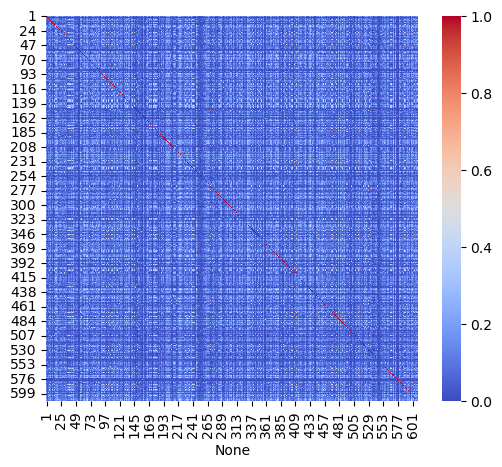

In [138]:
# 1.2 User-User similarity heatmap

plt.figure(figsize = (6,5))
sns.heatmap(usr_sim_mat, cmap = 'coolwarm')
plt.show()

In [140]:
# From the user-user heat map, it is observed that most of the similarities are less than 0.3. There are very few cases
# where user-user similarity is more than 0.4. It is seen that user - user similarity is overall quite low. The threshold
# to find the most similar users will be set at 0.5.

In [142]:
#Function for User based collaborative filtering

def user_user(user_id):
    # Find the most similar users based on similarity (set threshold at 0.5)
    a = usr_sim_mat.loc[user_id,:][usr_sim_mat.loc[user_id,:]>0.5]
    j = list(int(str(i).replace('(','').replace(',)','')) for i in a.index)
    j.remove(user_id)  # J is the list of most similar users
    
    # Find average ratings of all similar users for every movie
    
    if(not j):  # In case there are no similar users.
        rmse = 'not applicable'
        Precision_at_K_1 = 'not applicable'
        recall_at_K_1 = 'not applicable'
        mov_watched_highrated = pd.DataFrame()
        mov_rec_userbased = []
        return(rmse, Precision_at_K_1, recall_at_K_1, mov_watched_highrated, mov_rec_userbased)
    else:
        k = []
        for m in ratings_dt['movieId'].unique():
            g=[]
            for l in j:
                if(l in ratings_dt[ratings_dt['movieId']==m]['userId'].values):
                    y = ratings_dt[ratings_dt['movieId']==m][ratings_dt['userId']==l]['rating'].values
                    y = float(str(y).replace('[','').replace(']',''))
                    g.append(y)
                else:
                    g.append(0)
            h = sum(g)/len(g)
            k.append(h)             # k is the list of average ratings for all movies (predicted ratings)
        
            # Select the movies watched by at least one similar user

            mov_av_rating_dic = dict(zip(ratings_dt['movieId'].unique(), k)) # Dictionary of movies and predicted ratings for every movie
            mov_watched = {k:v for k,v in mov_av_rating_dic.items() if mov_av_rating_dic[k]>0} # Select those dictionary items where predicted ratings are > 0.
    
            # Data frame of movies watched by atleast one similar user and the predicted ratings derived from average of similar user ratings
            mov_watched = pd.DataFrame(list(mov_watched.items()), columns=['movieId','pred_rating'])
    
            # Create data frame of predicted ratings with the actual ratings for movies watched by the target user
            mov_wat_target = ratings_dt[ratings_dt['userId']==user_id][['movieId','rating']]
            mov_pred_actual = mov_watched.merge(mov_wat_target, how='inner', on='movieId')
    
            # Compute RMSE
            if(mov_pred_actual.empty):
                print('no common movies between target user and most similar users')
            else:
                rmse = sqrt(mean_squared_error(mov_pred_actual['pred_rating'], mov_pred_actual['rating']))
        
            # Based on predictions, select movies whose predicted ratings > 0.7
    
            mov_watched_highrated = mov_watched[mov_watched['pred_rating']>0.7]  #Recommended movies (movie ids)
    
            #Precision@K (relevant movies for target user/recommended movies)
            # Relevant movies are the ones actually watched and rated very highly by the target user

            K = len(mov_watched_highrated)
            pr = 0
            for i in mov_watched_highrated['movieId'].values:
                if(i in ratings_dt[ratings_dt['userId']==user_id]['movieId'].values):
                    r = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['movieId']==i]['rating'].values
                    r = float(str(r).replace('[','').replace(']',''))
                    if(r>0.7):
                        pr=pr+1
            Precision_at_K_1 = pr/K
    
           #Recall@K (Relevant movies in the recommended list / Total number of movies relevant for the target user)
            re = 0

            rel_movies = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['rating']>0.7]['movieId'].values # Movies rated very highly by target user

            for i in rel_movies:
                if(i in mov_watched_highrated['movieId'].values):
                    re = re+1

            K = len(rel_movies)

            recall_at_K_1 = re/K

            # Names of the recommended movies
            mov_rec_userbased = []
            for m in mov_watched_highrated['movieId'].values:
                y = movie_dt[movie_dt['movieId']==m]['title'].values
                y = ''.join(y)
                mov_rec_userbased.append(y)

            mov_rec_userbased #recommended movies from user user collaborative filtering
    
            return(rmse, Precision_at_K_1, recall_at_K_1, mov_watched_highrated, mov_rec_userbased)


In [144]:
# 2. Item based Collaborative filtering 
# 2.1 Item-item similarity

item_sim = user_item.T.dot(user_item)
auto_mat = np.sqrt(item_sim.diagonal())
item_sim_mat = item_sim/(auto_mat[np.newaxis,:]*auto_mat[:,np.newaxis])
item_ids = list(ratings_dt['movieId'].unique())
item_sim_mat = pd.DataFrame(item_sim_mat, columns=[item_ids])
item_sim_mat.index = item_ids
item_sim_mat

,1,3,6,47,50,70,101,110,151,157,...,147662,148166,149011,152372,158721,160341,160527,160836,163937,163981
1,1.000000,0.293356,0.371859,0.430151,0.436603,0.236036,0.210623,0.472354,0.211865,0.148554,...,0.087165,0.087165,0.087165,0.087165,0.087165,0.087165,0.087165,0.087165,0.087165,0.087165
3,0.293356,1.000000,0.274021,0.273876,0.196281,0.156278,0.166779,0.249098,0.190612,0.194606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.371859,0.274021,1.000000,0.461457,0.451035,0.373741,0.171334,0.456939,0.267181,0.198157,...,0.125840,0.125840,0.125840,0.125840,0.125840,0.125840,0.125840,0.125840,0.125840,0.125840
47,0.430151,0.273876,0.461457,1.000000,0.573252,0.368768,0.201623,0.584053,0.265244,0.191282,...,0.087852,0.087852,0.087852,0.087852,0.087852,0.087852,0.087852,0.087852,0.087852,0.087852
50,0.436603,0.196281,0.451035,0.573252,1.000000,0.360216,0.262241,0.468630,0.250607,0.190160,...,0.064112,0.064112,0.064112,0.064112,0.064112,0.064112,0.064112,0.064112,0.064112,0.064112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160341,0.087165,0.000000,0.125840,0.087852,0.064112,0.148734,0.000000,0.070966,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
160527,0.087165,0.000000,0.125840,0.087852,0.064112,0.148734,0.000000,0.070966,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
160836,0.087165,0.000000,0.125840,0.087852,0.064112,0.148734,0.000000,0.070966,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
163937,0.087165,0.000000,0.125840,0.087852,0.064112,0.148734,0.000000,0.070966,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


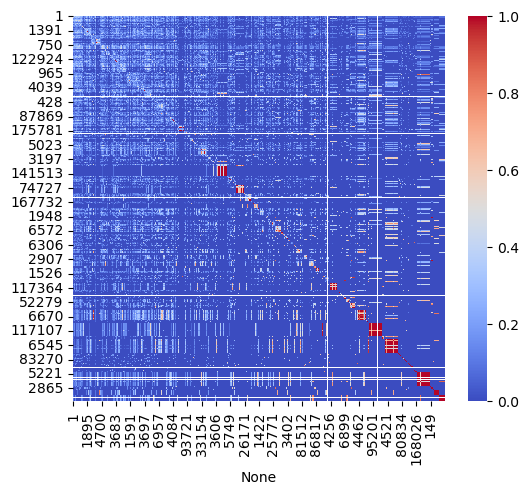

In [146]:
# 2.2 Item item similarity heat map

plt.figure(figsize = (6,5))
sns.heatmap(item_sim_mat.iloc[0:9723,0:9723], cmap = 'coolwarm')
plt.show()

In [271]:
#Function for Item based collaborative filtering

def item_item(user_id):
    #Select movies wactched and rated highly by a user (relevant for the user)
    mov_watched_user = ratings_dt[ratings_dt['userId']==user_id][['movieId','rating']]
    mov_watched_user = mov_watched_user[mov_watched_user['rating']>0.7]  #List of relevant movies for the target user

    #Extract list of movie ids from item item similarity matrix
    c = [int(str(i).replace('(','').replace(',)','')) for i in item_sim_mat.columns.values]
    item_col_values = c  
    
    # Select movies highly similar to movies watched and rated highly by target user (threshold of item-item similairy = 0.4)

    similar_mov = []
    for m in mov_watched_user['movieId'].values:
        mov_id = []
        for j in item_col_values:
            if(m!=j):
                p = list(item_sim_mat.loc[m,j].values)
                y = float(str(p).replace('[','').replace(']',''))
                if(y>0.5):
                    mov_id.append(j)
                   
        if(not mov_id):
            similar_mov.append('no similar movies found')
        else:
            similar_mov.append(mov_id)
           
            
    mov_sim_dict = dict(zip(mov_watched_user['movieId'], similar_mov))  #dictionary of each highly rated movie and its corresponding highly similar movies
   
    mov_similar = {k:v for k,v in mov_sim_dict.items() if(v!='no similar movies found')}  #Remove movies where no similar movies were found 
   
    sim_movies = [x for y in mov_similar.values() for x in y]
    
    #Recommended list of movie ids
    mov_id_sim = list(set(sim_movies))

    #Recommended list of movie names
    movie_name = []
    for movie in movie_dt['movieId']:
        if(movie in mov_id_sim):
            movie_name.append(list(movie_dt[movie_dt['movieId']==movie]['title'].values))
    movie_name_rec = [m for x in movie_name for m in x]
    
    #Precision@K (relevant movies for target user/recommended movies)

    K = len(mov_id_sim)
    pr = 0
    for i in mov_id_sim:
        if(i in ratings_dt[ratings_dt['userId']==user_id]['movieId'].values):
            r = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['movieId']==i]['rating'].values
            r = float(str(r).replace('[','').replace(']',''))
            if(r>0.7):
                pr=pr+1
    Precision_at_K_2 = pr/K

    
    #Recall@K (relevant items to a user from the recommended list / total number of relevant items for the user from dataset)

    re = 0
    for i in mov_watched_user['movieId'].values:
        if(i in mov_id_sim):
            re = re+1

    K = len(mov_watched_user)

    recall_at_K_2 = re/K
    
    return(Precision_at_K_2, recall_at_K_2, mov_id_sim, movie_name_rec)

In [273]:
# 3. Content based recommendation system

# 3.1 Create movie feature matrix

movie_fea = pro_movie.drop(['title','genres','movieId'],axis=1)
movie_fea = movie_fea.to_numpy()

movie_sim = movie_fea.dot(movie_fea.T)
auto_sim = np.sqrt(movie_sim.diagonal())
mov_sim_mat = movie_sim/(auto_sim[np.newaxis,:]*auto_sim[:,np.newaxis])

mov_sim_df = pd.DataFrame(mov_sim_mat, columns=[pro_movie['movieId']], index=[pro_movie['movieId']])
mov_sim_df

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
193583,0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
193585,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [274]:
#Function for content based filtering

def content_based(user_id):
    
    #Select movies rated very highly by target user (assume > 0.7)
    high_rat = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['rating']>0.7]
    movie_selec = high_rat['movieId']

    #Find movies similar in content to the highly rated movies by using movie feature matrix
    y = []
    for m in tqdm(movie_selec):
        x=[]
        for j in movie_dt['movieId'].values:
            m1 = float(str(mov_sim_df.loc[m,j].values).replace('[[','').replace(']]',''))
            if(m1>0.9):
                if(m!=j):
                    x.append(j)
    y.append(x)   
    mov_list = [x for z in y for x in z]
    mov_list_rec = list(set(mov_list))   #Recommended movie ids

    #Recommended movie names
    mov_rec_name = []
    for i in mov_list_rec:
        j = ''.join(movie_dt[movie_dt['movieId']==i]['title'].values)
        mov_rec_name.append(j)

    # Precision@K (relevant items/recommended items)

    K = len(mov_list_rec)
    pr = 0
    for i in mov_list_rec:
        if(i in ratings_dt[ratings_dt['userId']==user_id]['movieId'].values):
            r = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['movieId']==i]['rating'].values
            r = float(str(r).replace('[','').replace(']',''))
            if(r>0.7):
                pr=pr+1

    Precision_at_K_3 = pr/K
    
    #Relevant items for a user (movies wathed and rated highly)

    mov_watched_user = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['rating']>0.7]['movieId'].values
    
    #Recall @K (relevant items from recommended list/total number of relevant items for the user from the data)
   
    K = len(mov_watched_user)
    re = 0
    for i in mov_watched_user:
        if(i in mov_list_rec):
            re = re+1


    recall_at_K_3 = re/K
    return(Precision_at_K_3, recall_at_K_3, mov_list_rec, mov_rec_name)

In [275]:
# To address the cold start problem, a new user may be asked about favourite genre. The highly rated genre/genres can be used to select 
# movies of the same content (content based filtering). Movies based on favourite genre can be further used to select and more movies by using
# item based collaborative filtering. Here, user based filtering cannot be used due to a lack of user watch history.

In [276]:
# Hybrid model (cascading approach)
# Combine recommended movies from user and item based filtering (union of movie ids)
# Use the recommended list from collaborative filtering to select movies similar in content to the movies and highly rated by the target user 
# Combine the recommended lists from collaborative and content based filtering

def hybrid_cascade(user_id, mov_watched_highrated, recom_movieId_item):
    if(mov_watched_highrated.empty):
        mov_collab = recom_movieId_item   # recommended list from item based collaborative filtering
    else:
        mov_userbased = mov_watched_highrated['movieId']        #recommended list from user based collaborative filtering
        mov_itembased = recom_movieId_item                       # recommended list from item based collaborative filtering
        mov_collab = list(set(mov_userbased).union(set(mov_itembased)))  #combined list
        
     
    #Select movies rated very highly by target user (assume > 0.7)
    high_rat = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['rating']>0.7]
    movie_selec = high_rat['movieId']
    
    # Pass through content based filtering 
    con_mov = []
    for m in tqdm(mov_collab):
        for j in movie_selec.values:
            m1 = float(str(mov_sim_df.loc[m,j].values).replace('[[','').replace(']]',''))
            if(m1>0.9):
                if(m!=j):
                    con_mov.append(m) 
                    
    mov_list_rec = list(set(con_mov).union(set(mov_collab)))   #Final recommended list of movie ids
    
    
    #Precision@K 

    K = len(mov_list_rec)
    pr = 0
    for i in mov_list_rec:
        if(i in ratings_dt[ratings_dt['userId']==user_id]['movieId'].values):
            r = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['movieId']==i]['rating'].values
            r = float(str(r).replace('[','').replace(']',''))
            if(r>0.7):
                pr=pr+1

    Precision_at_K_4 = pr/K
    
    #Recall@K
    mov_watched_user = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['rating']>0.7]['movieId'].values #List of relevant movies for target user
    
    K = len(mov_watched_user)
    re = 0
    for i in mov_watched_user:
        if(i in mov_list_rec):
            re = re+1


    recall_at_K_4 = re/K
    
    return(Precision_at_K_4, recall_at_K_4, mov_list_rec)

In [277]:
# Hybrid model (stacking recommendations approach)
# Stack predictions from  collaborative and content based filtering

def hybrid_stacking(user_id, mov_watched_highrated, mov_id_sim, mov_list_rec):
    if(mov_watched_highrated.empty):
        mov_itembased = list(mov_id_sim)   # recommended list from item based collaborative filtering
        mov_collab = list(set(mov_itembased))  
    else:
        mov_userbased = list(mov_watched_highrated['movieId'].values)
        mov_itembased = list(mov_id_sim)
        mov_collab = list(set(mov_userbased).union(set(mov_itembased)))
    
    final_rec_movies = list(set(mov_collab).union(set(mov_list_rec)))  #recommended list hybrid model
    
    #Precision@K 

    K = len(final_rec_movies)
    pr = 0
    for i in final_rec_movies:
        if(i in ratings_dt[ratings_dt['userId']==user_id]['movieId'].values):
            r = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['movieId']==i]['rating'].values
            r = float(str(r).replace('[','').replace(']',''))
            if(r>0.7):
                pr=pr+1

    Precision_at_K_5 = pr/K
    
    #Recall@K
    
    mov_watched_user = ratings_dt[ratings_dt['userId']==user_id][ratings_dt['rating']>0.7]['movieId'].values #List of relevant movies for target user
    
    K = len(mov_watched_user)
    re = 0
    for i in mov_watched_user:
        if(i in final_rec_movies):
            re = re+1
    recall_at_K_5 = re/K
    
    return(Precision_at_K_5, recall_at_K_5, final_rec_movies)

In [283]:
user_input = int(input('Enter user id:'))

#User user collaborative filtering
rmse1, Precision_at_K_1, recall_at_K_1, recom_movieId_user, recom_moviename_user = user_user(user_input)

#item item collaborative filtering
Precision_at_K_2, recall_at_K_2, recom_movieId_item, recom_moviename_item = item_item(user_input)

#content based filtering
Precision_at_K_3, recall_at_K_3, recom_movieId_content, recom_moviename_con = content_based(user_input)

#Hybrid model cascading approach
    
Precision_at_K_4, recall_at_K_4, recom_movieId_hybcas = hybrid_cascade(user_input, recom_movieId_user, recom_movieId_item)

#Hybrid model stacking predictions

Precision_at_K_5, recall_at_K_5, recom_movieId_hybsta = hybrid_stacking(user_input, recom_movieId_user, recom_movieId_item, recom_movieId_content)


Enter user id: 22


100%|██████████| 232/232 [00:02<00:00, 94.62it/s] 


In [289]:
#Model comparison

table = PrettyTable()
table.field_names = ["Model name", "Precision", "Recall"]
table.add_row(["user-user colaborative filtering", Precision_at_K_1, recall_at_K_1,])
table.add_row(["item-item collaborative filtering", round(Precision_at_K_2,2), round(recall_at_K_2,2)])
table.add_row(["content based filtering", round(Precision_at_K_3,2), round(recall_at_K_3,2)])
table.add_row(["Hybrid model cascading approach", round(Precision_at_K_4,2), round(recall_at_K_4,2)])
table.add_row(["Hybrid model stacking prediction", round(Precision_at_K_5,2), round(recall_at_K_5,2)])

In [291]:
# model comparison
table

Model name,Precision,Recall
user-user colaborative filtering,not applicable,not applicable
item-item collaborative filtering,0.06,0.36
content based filtering,0.0,0.03
Hybrid model cascading approach,0.06,0.36
Hybrid model stacking prediction,0.02,0.39


In [ ]:
# In this movie recommendation system, a target user was selected and movies were recommended by using different approaches 
# viz. user based and item based collaborative filtering, content based filtering and hybrid model. To simplify the process of movie recommendation, the data was not split into train and 
# test data. The whole data was used for analysing user preferences and movie features. 

In [ ]:
# It is observed that model performance differs from one user to another. However, hybrid models overall deliver better
# results than the individual models, especially in recall@K. The hybrid model can generate more number of relevant 
# items from the recommended list. The performance of each individual model also depends threshold in user-user similarity and item-item similarity.
# A higher threshold gives a clearer picture of the effectiveness of a recommendation method.

In [ ]:
# User based collaborative filtering: Is quite useful when a user has a watch history and shares similar interests with 
#                                     many other users. However, the method is not feasable for a new user or for a user 
#                                     whose preferences do not match with those of the other users.

# Item based collaborative filtering: Is implemented when an item has already been used by many users. So it is easy to extract similar items
#                                     based on the number of common users and similar ratings given by the same users. Item based
#                                     collaborative filtering cannot be used for a new item. In such cases, the content or the item features
#                                     should be analysed to find the most similar items and the users who rated them highly. Item based is also not 
#                                     effective if item-item similarity is low.

# Content based filtering approach: Content based approach is useful in addressing the cold start problem where weither the user or item is
#                                    new. The new user can be recommended items based on one's preferences in features/genre that the user selected
#                                    for the first time. It helps offer a more personalised service to the users. Similarly, a new item can be 
#                                     offered to the existing users whose preferences match with the item features.

# Hybrid (cascading)approach: In one hybrid approach, the recommended items from collaborative filtering were passed thorugh content based filtering 
#                             to find more items similar in content/features. The idea behind this approach is to offer more choices to the target user.
#                             The underlying assumption of this approach is that the user or the item is not new and shares similarity with many 
#                              other users or items based on the usage history. It is also assumed that collaborative filtering will generate 
#                              a list of movies in alignment with the user interests.

# Hybrid (stacking) approach: In this approach, the recomended items from both collaborative and content based filtering are combined. Here, an equal
#                            weightage is given to both the approaches and all the top recommended movies are selected from all methods. This method
#                            can also generate results for a cold start problem where content based approach alone can recommend movies to a new user.

In [ ]:
# Evaluation metrics:

# Precision@K: It is used to find the ratio of relevant items from the recommended list to the number of recommended items. The evaluation
#              metric can be used to test a recommendation system only when a user actually watches a movie from the recommended list and gives it a
#              high rating. Higher the precision, more robust the recommendation system. However, precision is not an effective metric if a user 
#              has watched and rated very few movies from the recommended list. It is difficult to assess the robustness in case of low precision, 
#              as the user's opinions about most of the other movies is not known.

# Recall@K: Is a useful metric in determing if the recommended list offers only relevant items to the target user. 

# RMSE: The metric is useful only when the actual user ratings are known and there is a high similarity between a target user and its similar users.
#        In case of low user-user similarity, the predicted movie ratings will not be a good estimate of the actual ratings. RMSE also cannot be
#        used for a new user.